In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style='white', context='notebook', palette='muted')
import matplotlib as plt

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.Data Exploring

1.2 preview of data

In [2]:
print("shape of train dataset:", train.shape)
print("shape of test dataset:", test.shape)

shape of train dataset: (891, 12)
shape of test dataset: (418, 11)


In [3]:
display(train.head(), test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


1.3 concat data

In [4]:
full = pd.concat([train, test], ignore_index=True)
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


we find data loss in age, fare, cabin, embarked.

1.4 features analysis

1.4.1 Embarked and Suevived

<Axes: xlabel='Embarked', ylabel='Survived'>

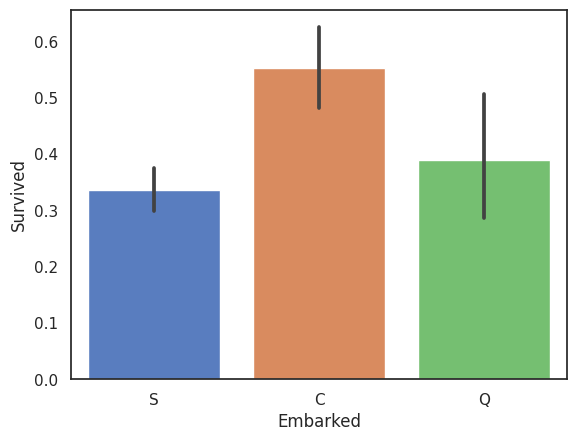

In [6]:
sns.barplot(data=train, x='Embarked', y='Survived')

In [7]:
s = full.groupby('Embarked')['Survived'].value_counts().to_frame()
display(s)
display(s.agg({'count':'sum'}))
#print(s.sum(level=0))
# for i in range(1, h, 2):
#     sum = s[i-1,0] + s[i,0];
#     s2[i-1,0] =s[i-1,0] / sum;
#     s2[i,0] =s[i,0] / sum;
#s2 = s / s.sum() #survivied ratio
#pd.merge(s, s2, left_index=True, right_index=True, suffix=['_num', '_rate'])

count
Embarked Survived       
C        1.0          93
         0.0          75
Q        0.0          47
         1.0          30
S        0.0         427
         1.0         217

count    889
dtype: int64

Embarked C has highest survied ration

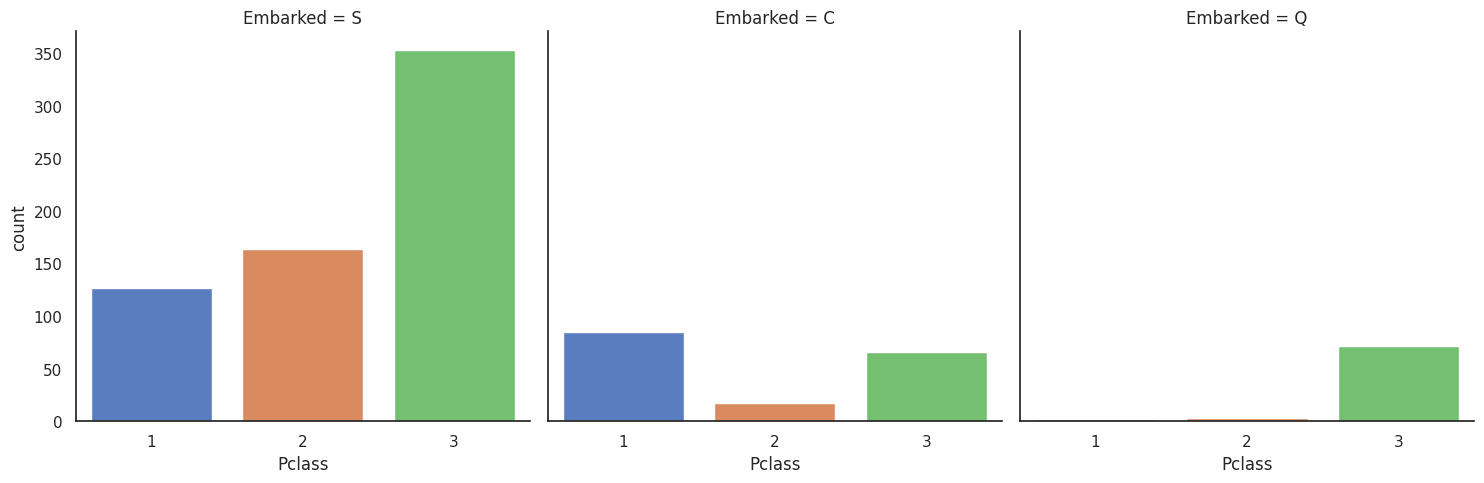

In [8]:
sns.catplot(data=train, x='Pclass', col='Embarked', kind='count')

Highest Ratio of First class occurs in Embarked C, and C has highest survied ratio, so it proves that first class means higher survied ratio.

1.4.2 Parch and Survied

<Axes: xlabel='Parch', ylabel='Survived'>

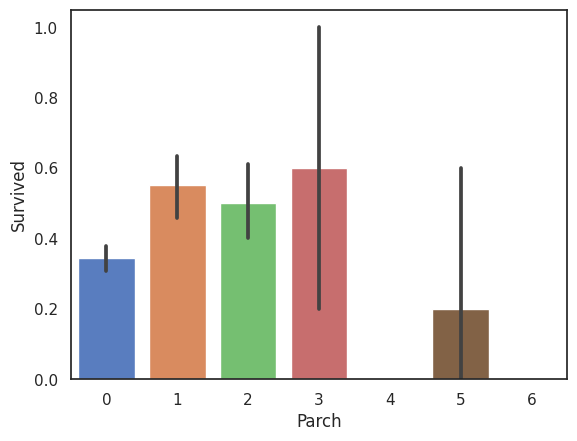

In [9]:
sns.barplot(data=train, x='Parch', y='Survived')

When the number of parent and children traveling with passenger is moderate， survived ratio is higher

1.4.3 SibSp and Survived

<Axes: xlabel='SibSp', ylabel='Survived'>

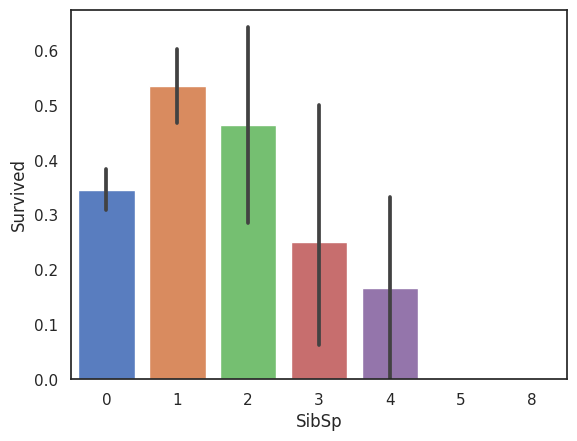

In [10]:
sns.barplot(data=train, x='SibSp', y='Survived')

1.4.4 Pclass and Survived

<Axes: xlabel='Pclass', ylabel='Survived'>

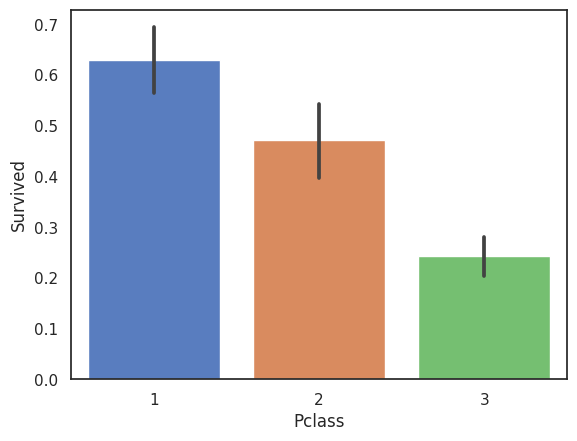

In [11]:
sns.barplot(data=train, x='Pclass', y='Survived')

1.4.5 Sex and Survived

<Axes: xlabel='Sex', ylabel='Survived'>

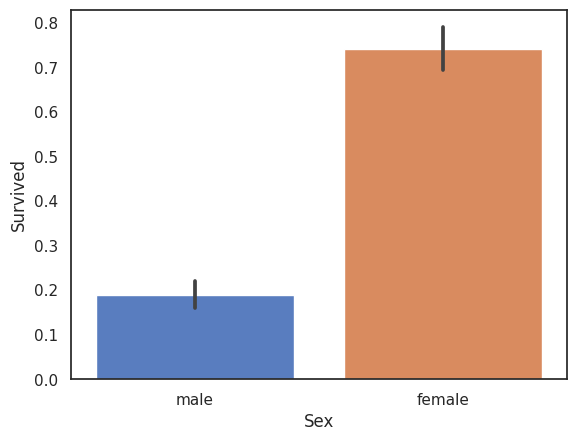

In [12]:
sns.barplot(data=train, x='Sex', y='Survived')

1.4.6 age and survived

<Axes: xlabel='Age', ylabel='Survived'>

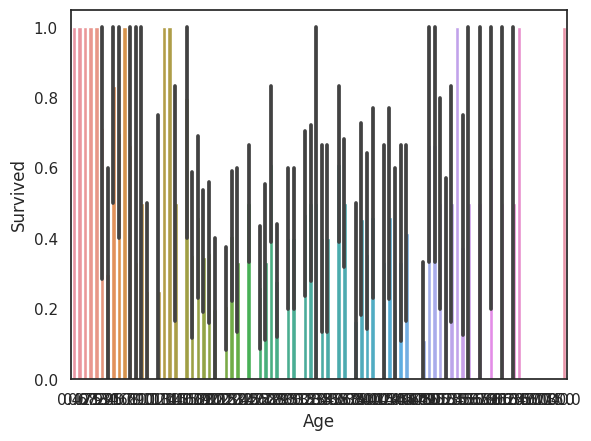

In [13]:
sns.barplot(data=train, x='Age', y='Survived')

1.4.7 Fare and Survived

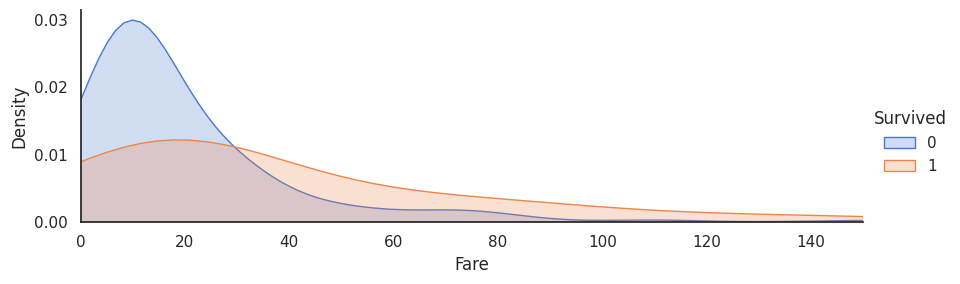

In [14]:
ageFacet=sns.FacetGrid(train, hue='Survived', aspect=3)#init grid(canvas)
ageFacet.map(sns.kdeplot, 'Fare', shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

In [15]:
Costing more cause higher survived ratio

SyntaxError: invalid syntax (3393611692.py, line 1)

In [ ]:
full['Fare'] = full['Fare'].map(lambda x: np.log(x) if x > 0 else x)#use log to smooth data
farePlot = sns.distplot(full['Fare'][full['Fare'].notnull()], 
                        label='skewness:%.2f'%(full['Fare'].skew()))#skewness：偏态
farePlot.legend(loc='best')

2. Data preprocessing

2.1 Data Cleaning

2.1.1 Cabin data Missing value filling

In [ ]:
full['Cabin']=full['Cabin'].fillna('U')#fill unknow
full['Cabin'].head()

2.1.2 Embarked data Missing value filling

In [ ]:
display(full[full['Embarked'].isnull()])
display(full['Embarked'].value_counts())
full['Embarked']=full['Embarked'].fillna('S')#S has highest possibility

2.1.2 Fare data Missing value filling

In [ ]:
display(full[full['Fare'].isnull()])

In [ ]:
#estimate missing value by calculate mean of data who has the same cabin, Embark, PClass
price = full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]['Fare'].mean()

full['Fare'] = full['Fare'].fillna(price)

2.2 feature engineering

2.2.1 Extract Title in Name

In [ ]:
display(train.head())

In [ ]:
#get title from name
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
display(full['Title'].value_counts())

In [ ]:
#define title dict
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title'] = full['Title'].map(TitleDict)
full['Title'].value_counts()

In [ ]:
sns.barplot(data=full, x='Title',y='Survived')

2.2.2 Number of Family members

In [ ]:
full['FamilyNum'] = full['Parch'] + full['SibSp'] + 1

sns.barplot(data=full, x='FamilyNum', y='Survived')

2-4 family members has higher survived ratio

In [ ]:
def familyKluster(familyNum):
    if familyNum == 1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2
    
full['FamilySize'] = full['FamilyNum'].map(familyKluster)
full['FamilySize'].value_counts()

In [ ]:
sns.barplot(data=full, x='FamilyNum', y='Survived')

2.2.3 Cabin type

In [ ]:
full['Cabin'].unique()

In [ ]:
full['Cabin'] = full['Cabin'].map(lambda x:x[0])#first letter prepresent type of cabin

sns.barplot(data=full, x='Cabin', y='Survived')

2.2.4 Shared Tickets

In [16]:
TicketCountDict = full['Ticket'].value_counts()
TicketCountDict.head()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: count, dtype: int64

<Axes: xlabel='TicketShare', ylabel='Survived'>

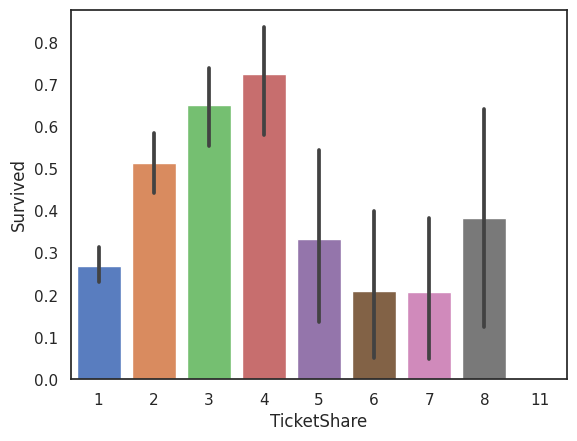

In [17]:
full['TicketShare'] = full['Ticket'].map(TicketCountDict)
full['TicketShare'].head()
sns.barplot(data=full, x='TicketShare',y='Survived')

<Axes: xlabel='TicketGroup', ylabel='Survived'>

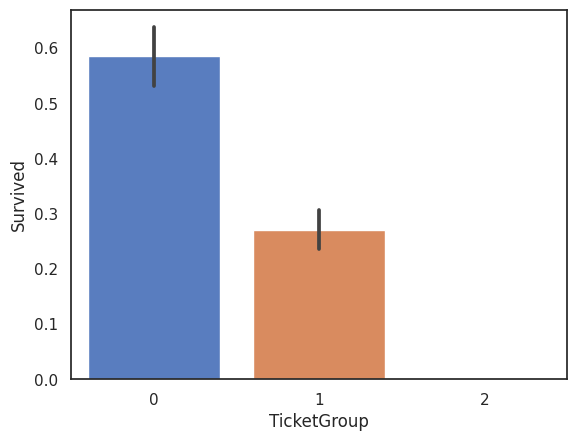

In [18]:
def TickKluster(num):
    if (num>=2) & (num<=4):
        return 0
    elif (num==1) | ((num>=5) & (num<=8)):
        return 1
    else:
        return 2

full['TicketGroup'] = full['TicketShare'].map(TickKluster)
sns.barplot(data=full, x='TicketGroup', y='Survived')

2.2.5 Fill Age

In [19]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketShare,TicketGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [ ]:
#select info related to age
agePre = full[['Age', 'Parch', 'Pclass', 'SibSp', 
               'FamilyNum', 'TicketShare', 'Title', 
               'Fare', 'Embarked', 'Cabin']]
agePre = pd.get_dummies(agePre)#one-hot 
agePre.head()

In [ ]:
#check correlation
ageCorrDf=agePre.corr()
ageCorrDf['Age'].sort_values()

In [ ]:
ageKnow = agePre[agePre['Age'].notnull()]
ageUnkonw = agePre[agePre['Age'].isnull()]

ageKnow_x=ageKnow.drop(['Age'], axis=1)
ageKnow_y=ageKnow['Age']

ageUnknow_x=ageUnkonw.drop(['Age'], axis=1)

#build model to predict age
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None, n_estimators=500, n_jobs=-1)
rfr.fit(ageKnow_x, ageKnow_y)

In [ ]:
score=rfr.score(ageKnow_x, ageKnow_y)
print('prediction score:', score)

In [ ]:
#start prediction
ageUnknow_pre = rfr.predict(ageUnknow_x)
#fill predited age 
full.loc[full['Age'].isnull(), ['Age']] = ageUnknow_pre
full.info()

so far, all missing data has been filled

2.3 Group effect Identification

    For example, same name, same age period...

Male group effect

In [ ]:
#count number of people with same surname
full['SurName']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full['SurName'].value_counts()
#display(SurNameDict)
full['SurNameNum']=full['SurName'].map(SurNameDict)

#more than 12 years old male with more than 1 family member
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['FamilyNum']>=2)]

#male group effect
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['SurName']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

It proves that male trend to die togother or live together 

Female group effect

In [ ]:
FemChildDf = full[((full['Sex']=='female')|(full['Age']<=12))&(full['FamilyNum']>=2)]

FCSurNamDf = FemChildDf['Survived'].groupby(FemChildDf['SurName']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

    It proves that female and children trend to live together or die together

Rectifiation to those groups:

    male group: sex changes to femal, age rectifies to 5
    female group: sex changes to male, age rectifies to 60

In [ ]:
MSurNamDict = MSurNamDf[MSurNamDf.values == 1].index
FCSurNamDict = FCSurNamDf[FCSurNamDf.values == 0].index

full.loc[(full['Survived'].isnull())&(full['SurName'].isin(MSurNamDict))&
         (full['Sex']=='male'), 'Sex']='female'
full.loc[(full['Survived'].isnull())&(full['SurName'].isin(MSurNamDict))&
         (full['Sex']=='male'), 'Age']=5

full.loc[(full['Survived'].isnull())&(full['SurName'].isin(FCSurNamDict))&
         ((full['Sex']=='female')|(full['Age']<=12)), 'Sex']='male'
full.loc[(full['Survived'].isnull())&(full['SurName'].isin(FCSurNamDict))&
         ((full['Sex']=='female')|(full['Age']<=12)), 'Age']=60

2.4 Data Filter

In [21]:
fulSel = full.drop(['Name', 'Ticket', 'PassengerId', 'SurName', 'SurNameNum'], axis = 1)
fulSel = pd.get_dummies(fulSel)
corrDf=pd.DataFrame()
corrDf=fulSel[fulSel['Survived'].notnull()].corr()
corrDf['Survived'].sort_values(ascending=True)

KeyError: "['SurName', 'SurNameNum'] not found in axis"

In [ ]:
fulSel = fulSel.drop(['FamilyNum', 'SibSp'], axis=1)

3. Contruct Model

3.1 build Model

SCV/Decision Tree/Gradient Boosting/LDA/KNN/Logistic Regression

In [ ]:
#construct input data
experData = fulSel[fulSel['Survived'].notnull()]
preData = fulSel[fulSel['Survived'].isnull()]

experData_x = experData.drop(['Survived'], axis=1)
experData_y = experData['Survived']

preData_x = preData.drop('Survived', axis=1)

#import alg
from sklearn.ensemble import \
RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

#set Kfold, cross sampling
kfold=StratifiedKFold(n_splits=10)

#algs init
classifiers = []
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [22]:
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, experData_x, experData_y,
                                    scoring='accuracy', cv=kfold, n_jobs=-1))
    
cv_mean=[]
cv_std=[]
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cvResDf=pd.DataFrame({'cv_mean':cv_mean,
                     'cv_std': cv_std,
                     'algorithm': ['SVC','DecisionTreeClassifier','RandomForestClassifier',
                                  'ExtraTreesClassifier', 'GradientBoostingClassifier',
                                  'KNeighborsClassifier', 'LogisticRegression',
                                   'LinearDiscriminantAnalysis']})
cvResDf

NameError: name 'classifiers' is not defined

In [23]:
bar = sns.barplot(data=cvResDf.sort_values(by='cv_mean', ascending=False),
                 x='cv_mean', y='algorithm',**{'xerr':cv_std})
bar.set(xlim=(0.7, 0.9))

NameError: name 'cvResDf' is not defined

3.2 Model parameter Optimization

In [ ]:
#GBC
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss':["log_loss"],
                'n_estimators' : [100, 150, 200, 250, 300],
                'learning_rate':[0.1, 0.08, 0.05, 0.03, 0.01],
                'max_depth': [4, 6, 8],
                'min_samples_leaf':[100, 130, 150],
                'max_features':[0.3, 0.2, 0.1]
                }
modelgsGBC = GridSearchCV(GBC, param_grid=gb_param_grid, cv=kfold, 
                         scoring='accuracy', n_jobs=-1, verbose=1)
modelgsGBC.fit(experData_x, experData_y)
modelgsGBC.best_score_

In [ ]:
#LR
LR = LogisticRegression()
lr_param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]
                }
modelgsLR = GridSearchCV(LR, param_grid=lr_param_grid, cv=kfold, 
                         scoring='accuracy', n_jobs=-1, verbose=1)
modelgsLR.fit(experData_x, experData_y)
modelgsLR.best_score_

In [ ]:
#LDA
LDA = LinearDiscriminantAnalysis()
lda_param_grid = {'solver':['svd','lsqr','eigen'],
                 'tol':[0.000001, 0.00001, 0.0001, 0.001, 0.01]
                }
modelgsLDA = GridSearchCV(LDA, param_grid=lda_param_grid, cv=kfold, 
                         scoring='accuracy', n_jobs=-1, verbose=1)
modelgsLDA.fit(experData_x, experData_y)
modelgsLDA.best_score_

3.3 Model Evaluation

In [ ]:
modelGBCpre_y = modelgsGBC.predict(experData_x).astype(int)

#draw roc curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thre = roc_curve(experData_y, modelGBCpre_y)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt 

plt.figure()
lw = 2
#plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r', lw=lw,
        label='ROC curve (area = %0.3f)' % roc_auc)

plt.plot([0,1],[0,1],color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBossting Model')
plt.legend(loc='lower right')
plt.show()

4. Prediction

In [ ]:
y_ = modelgsGBC.predict(preData_x).astype(int)

Result = pd.DataFrame()
Result['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
Result['Survived'] = y_
#save
Result.to_csv('./tao_titanic.csv', index=False)

In [ ]:
Result.head()